# Introduction to Probability: Random Variables
## Statistics for Data Science
---

## Review: What is the framework of classical probability?


* outcome, an equiprobable trial result $H$
* outcome space, $\Omega = \{H, T, \dots\}$
    * a set of *equiprobable* possible outcomes
* event, $E$ 
    * a combination of outcomes of interest
    * a subset of the outcome space
* probability, $P(E|\Omega) = P(E)$
    * a value between 0 and 1 inclusive
    * a *ratio* of relevant outcomes to all possible


In [1]:
from fractions import Fraction as F; 
F.__repr__ = F.__str__

def pr(event_set, outcome_set):
    return F(len(event_set & outcome_set)) / len(outcome_set)


In [2]:
pr({'H'}, {'H', 'T'})


1/2

## Example: Cards

We can use a set comprehension to generate a single-draw outcome space for a deck of cards:

In [3]:
len({r + s for r in 'AKQJT98765432' for s in '♥♠♦♣'})


52

And `combinations` to turn this into a 2-draw sample space:

In [4]:
from itertools import combinations
from random import sample


In [5]:
card_2 = set(combinations({r + s for r in 'AKQJT98765432' for s in '♥♠♦♣'}, 2))
players = sample(card_2, 3)
players


[('4♠', '9♥'), ('4♣', '9♥'), ('Q♠', '3♥')]

We can define a predicate (condition) function `T`, to filter the 2-card space,

In [6]:
value = dict(zip( 'AKQJT98765432', [11, 10, 10, 10, 10, 9, 8, 7, 6, 5, 4, 3, 2]))

def T(hand, n):
    return sum([ value[r] for (r, s) in hand ]) == n 

T(('2♠', '2♣'), 4)


True

`T` uses `value` to compute a numerical value for each card, and returns *whether* the sum of a 2-card hand is `n`

We can use `T` to define the event of obtaining a total of `4` in a two-card draw,

In [7]:
event_4 = {hand for hand in card_2 if T(hand, 4)}; 
event_4


{('2♠', '2♣'),
 ('2♠', '2♥'),
 ('2♠', '2♦'),
 ('2♥', '2♣'),
 ('2♦', '2♣'),
 ('2♦', '2♥')}

The probability of this event, relative to the 2-card outcome space, 

In [8]:
pr(event_4, card_2)


1/221

## What are Random Variables?

Sticking with this 2-card outcome space, note that essentially all of our probabilistic analysis deals with events directly. The `pr` function accepts sets of actual **cards**, 

In [9]:
sample(event_4, 1), sample(card_2, 1)


([('2♠', '2♣')], [('Q♥', '6♣')])

We enter the realm of statistical analysis when we work with numerical quantities derived from events, rather than events themselves. 

This is the world of "Random Variables", which despite their name, are *functions* from events to real numbers. 

In [10]:
def faces_rv(hand):
    return len({rank for rank, suit in hand if rank in 'AKQJ'})


In [11]:
faces_rv(('K♥', 'A♥'))


2

Here `faces_rv` is a random variable which maps a 2-card hand to a real number, in particular, the number of faces in that hand. 

## Why are Random Variables important?

Most of the time we are analysing *data*, the *data* is not the actual events. We do not know what series of events lead to a particular person's height. (If we did, we could compute a height deterministically). 

Statistics is the analysis of measurable quantities which arise from events, typically highly complex independent random events along with highly complex depenedent events. 

Roughly, the dependent events give rise to population *means* for the measure of interest; and the independent events give rise to their *variation*. 

When we measure "Height" we are really inspecting the output of a *function* from these events to a numer, height; we are simply ignorant of what the input of that function was.

If we knew the events we could define something like a `height_rv`, where we could map the event to a numerical impact on height, and sum(, mean) the impacts:

In [12]:
def height_rv(genetic_events, nutrition_events, other_random_events):
    gene_rv = [ float(event[1:]) for event in genetic_events ]
    food_rv = [ float(event[1:]) for event in nutrition_events ]
    etc_rv  = [ float(event[1:]) for event in other_random_events ]
    
    return (sum(gene_rv) + sum(food_rv)) * sum(etc_rv)
    
height_rv(['g100', 'g22', 'g3'], ['f-1', 'f5'],  ['e14'])


1806.0

## How do Random Variables define Feature Spaces?

In data science we often call the set of *possible* random variable measurements the "feature space"; where the "feature" is the name for the random variables we observe. 

We can use a manually defined RV function to map an outcome space into a feature space, 

In [13]:
X_faces = [faces_rv(outcome) for outcome in card_2]


In [14]:
X_faces[:5]


[0, 1, 1, 0, 0]

In [15]:
import seaborn as sns; 

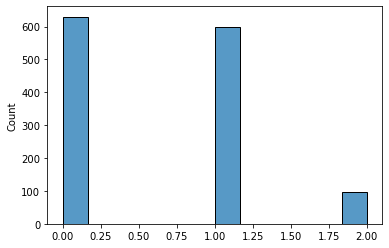

In [16]:
sns.histplot(X_faces);


Here `X` is the number of faces on 2-card draws; we can obtain this feature space (a space of real numbers) from an outcome space (a space of **cards**) via an RV function.

## How do you obtain a probability distribution from a Feature Space?

We are almost always dealing with feature spaces, ie., random variables. But a feature space isnt a probability distribution, it is just a numeric observable. 

The procedure of turning a feature space into a probability distribution can depend on what the feature itself is; typically we consider the probability of any individual measurement to be a *normalized frequency*, 

In [17]:
from collections import Counter


In [18]:
Counter(X_faces)


Counter({0: 630, 1: 600, 2: 96})

In [19]:
probX = { nfaces: F(count)/len(X_faces) for nfaces, count in Counter(X_faces).items() }


In [20]:
probX


{0: 105/221, 1: 100/221, 2: 16/221}

In [21]:
def plot_pmf(prob):
    sns.barplot(x=list(prob.keys()), y=list(prob.values()))
    

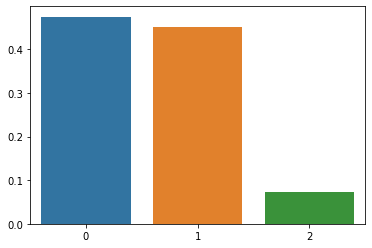

In [22]:
plot_pmf(probX)


## How do you sample from a Feature Space?

A feature space, eg., the numer of faces on a 2-card draw, can have an abitary distribution. In general, there is no a prior principle which says "a measurable variable" will have any frequency of observation. 

However there is a principle govening *samples* from such spaces,

In [23]:
from random import sample; from statistics import mean


In [24]:
one_game = sample(X_faces, 6); one_game


[1, 1, 0, 0, 0, 1]

Note the mean of a sample of these points,

In [25]:
mean(one_game)


0.5

Let's sample `1_000` times, and consider each mean,

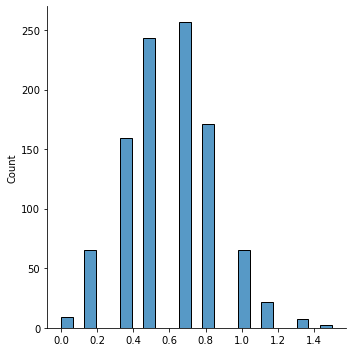

In [26]:
games = [ sample(X_faces, 6) for _ in range(1_000) ]
faces = [ mean(g) for g in games ]
sns.displot(faces);


The distribution of *sample means* is Normal!

This effect generalises *regardless* of the initial distribution,

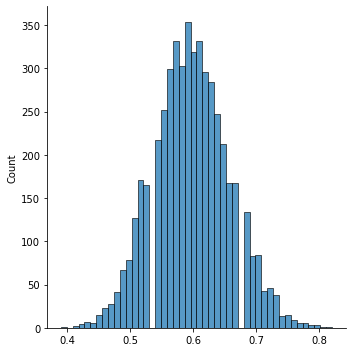

In [27]:
 sns.displot([mean(sample(X_faces, 100)) for _ in range(5_000)])
    

## Why are the sample means normally distributed?

This phenomenon is known as the *central limit theorem*, and explain the normal distribution.

The normal distribution arises from a large series of random events. The mean of the distribution is the value at which those random events most often "result"; the variation either side is symetric and caused by there being an equal effect of favourable events and unfavourable events either side of the most common. 

This occurs when enough random events have taken place.

Sample means are normally distributed because the act of *randomly* sampling is a random event. You randomly sample *as often* "unfavourably" as "favourably" so the next effect is a centring around a mean, with symmetric variation.